# Sonar Rock Mines

**dataset location** : [UCI](http://archive.ics.uci.edu/ml/datasets/connectionist+bench+(sonar,+mines+vs.+rocks))

**Business Problem** : The task is to train a network to discriminate between sonar signals bounced off a metal cylinder and those bounced off a roughly cylindrical rock

**Data Set Information**:

The file "sonar.mines" contains 111 patterns obtained by bouncing sonar signals off a metal cylinder at various angles and under various conditions. The file "sonar.rocks" contains 97 patterns obtained from rocks under similar conditions. The transmitted sonar signal is a frequency-modulated chirp, rising in frequency. The data set contains signals obtained from a variety of different aspect angles, spanning 90 degrees for the cylinder and 180 degrees for the rock. 

Each pattern is a set of 60 numbers in the range 0.0 to 1.0. Each number represents the energy within a particular frequency band, integrated over a certain period of time. The integration aperture for higher frequencies occur later in time, since these frequencies are transmitted later during the chirp. 

The label associated with each record contains the letter "R" if the object is a rock and "M" if it is a mine (metal cylinder). The numbers in the labels are in increasing order of aspect angle, but they do not encode the angle directly.

**Note**: Information is copied from UCI repository and for more details about dataset and its information go to [http://archive.ics.uci.edu/ml/datasets/connectionist+bench+(sonar,+mines+vs.+rocks)](http://archive.ics.uci.edu/ml/datasets/connectionist+bench+(sonar,+mines+vs.+rocks))

Lets get Started.....

Import the require library for analysis of dataset and model building
1. numpy
2. Pandas
3. matplotlib
4. seaborn
5. scipy
6. scikit-learn


In [74]:
#Load the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as py
import seaborn as sns
import warnings
import scipy as sc

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier
#from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [75]:
warnings.filterwarnings('ignore')

1. Load the dataset from localDisk using read_csv 
2. To work and do the chenges in dataset, let's create copy of dataset
3. head() gives the first 5 rows of datset
4. by looking roughly, looks like datasert value contain in range of 0 -1 and column name also are from numerical form
5. dataset has 208 rows and 61 feautures
6. All the feauture has same datatype i.e float
7. Dataset didnt contain missing value

In [76]:
#Load the dataset
dataset=pd.read_csv('sonar.csv',sep=',',header=None)
dt=dataset.copy()
dt.head()

0       1       2       3       4       5       6       7       8   \
0  0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1  0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2  0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3  0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4  0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   

       9  ...      51      52      53      54      55      56      57      58  \
0  0.2111 ...  0.0027  0.0065  0.0159  0.0072  0.0167  0.0180  0.0084  0.0090   
1  0.2872 ...  0.0084  0.0089  0.0048  0.0094  0.0191  0.0140  0.0049  0.0052   
2  0.6194 ...  0.0232  0.0166  0.0095  0.0180  0.0244  0.0316  0.0164  0.0095   
3  0.1264 ...  0.0121  0.0036  0.0150  0.0085  0.0073  0.0050  0.0044  0.0040   
4  0.4459 ...  0.0031  0.0054  0.0105  0.0110  0.0015  0.0072  0.0048  0.0107   

       59  60  
0  0.0032   R  
1  0.0044   R  
2  0.0078   R  
3  0.0117   R  
4  0.0094   R  

[5 rows x 61 columns]

In [77]:
#EDA
dt.shape

(208, 61)

In [78]:
dt.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
       ...   
31    float64
32    float64
33    float64
34    float64
35    float64
36    float64
37    float64
38    float64
39    float64
40    float64
41    float64
42    float64
43    float64
44    float64
45    float64
46    float64
47    float64
48    float64
49    float64
50    float64
51    float64
52    float64
53    float64
54    float64
55    float64
56    float64
57    float64
58    float64
59    float64
60     object
Length: 61, dtype: object

In [79]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
0     208 non-null float64
1     208 non-null float64
2     208 non-null float64
3     208 non-null float64
4     208 non-null float64
5     208 non-null float64
6     208 non-null float64
7     208 non-null float64
8     208 non-null float64
9     208 non-null float64
10    208 non-null float64
11    208 non-null float64
12    208 non-null float64
13    208 non-null float64
14    208 non-null float64
15    208 non-null float64
16    208 non-null float64
17    208 non-null float64
18    208 non-null float64
19    208 non-null float64
20    208 non-null float64
21    208 non-null float64
22    208 non-null float64
23    208 non-null float64
24    208 non-null float64
25    208 non-null float64
26    208 non-null float64
27    208 non-null float64
28    208 non-null float64
29    208 non-null float64
30    208 non-null float64
31    208 non-null float64
32    208 non-null float64
33  

In [80]:
dt.describe()

0           1           2           3           4           5   \
count  208.000000  208.000000  208.000000  208.000000  208.000000  208.000000   
mean     0.029164    0.038437    0.043832    0.053892    0.075202    0.104570   
std      0.022991    0.032960    0.038428    0.046528    0.055552    0.059105   
min      0.001500    0.000600    0.001500    0.005800    0.006700    0.010200   
25%      0.013350    0.016450    0.018950    0.024375    0.038050    0.067025   
50%      0.022800    0.030800    0.034300    0.044050    0.062500    0.092150   
75%      0.035550    0.047950    0.057950    0.064500    0.100275    0.134125   
max      0.137100    0.233900    0.305900    0.426400    0.401000    0.382300   

               6           7           8           9      ...              50  \
count  208.000000  208.000000  208.000000  208.000000     ...      208.000000   
mean     0.121747    0.134799    0.178003    0.208259     ...        0.016069   
std      0.061788    0.085152    0.118387    0.134416     ...        0.012008   
min      0.003300    0.005500    0.007500    0.011300     ...        0.000000   
25%      0.080900    0.080425    0.097025    0.111275     ...        0.008425   
50%      0.106950    0.112100    0.152250    0.182400     ...        0.013900   
75%      0.154000    0.169600    0.233425    0.268700     ...        0.020825   
max      0.372900    0.459000    0.682800    0.710600     ...        0.100400   

               51          52          53          54          55          56  \
count  208.000000  208.000000  208.000000  208.000000  208.000000  208.000000   
mean     0.013420    0.010709    0.010941    0.009290    0.008222    0.007820   
std      0.009634    0.007060    0.007301    0.007088    0.005736    0.005785   
min      0.000800    0.000500    0.001000    0.000600    0.000400    0.000300   
25%      0.007275    0.005075    0.005375    0.004150    0.004400    0.003700   
50%      0.011400    0.009550    0.009300    0.007500    0.006850    0.005950   
75%      0.016725    0.014900    0.014500    0.012100    0.010575    0.010425   
max      0.070900    0.039000    0.035200    0.044700    0.039400    0.035500   

               57          58          59  
count  208.000000  208.000000  208.000000  
mean     0.007949    0.007941    0.006507  
std      0.006470    0.006181    0.005031  
min      0.000300    0.000100    0.000600  
25%      0.003600    0.003675    0.003100  
50%      0.005800    0.006400    0.005300  
75%      0.010350    0.010325    0.008525  
max      0.044000    0.036400    0.043900  

[8 rows x 60 columns]

**Analysis of Target variable:**
1. Taret variable contain 2 categories M -mines, R- rock
2. count for mines is 111 and Rock is 97
3. It mean we have balanced dataset

60
M    111
R     97
dtype: int64


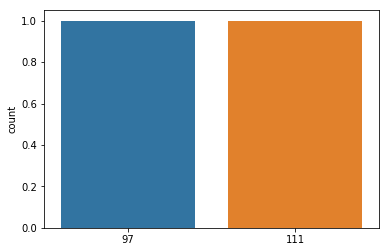

In [81]:
unique=dt.groupby(60).size()
print(unique)
sns.countplot(unique)
py.show()

**Analysis using Histogram**

1. To understand each numerical feature and its distribution,let's plot histogram
2. From histogram , it's look like all are in same range but still let's check its skewness

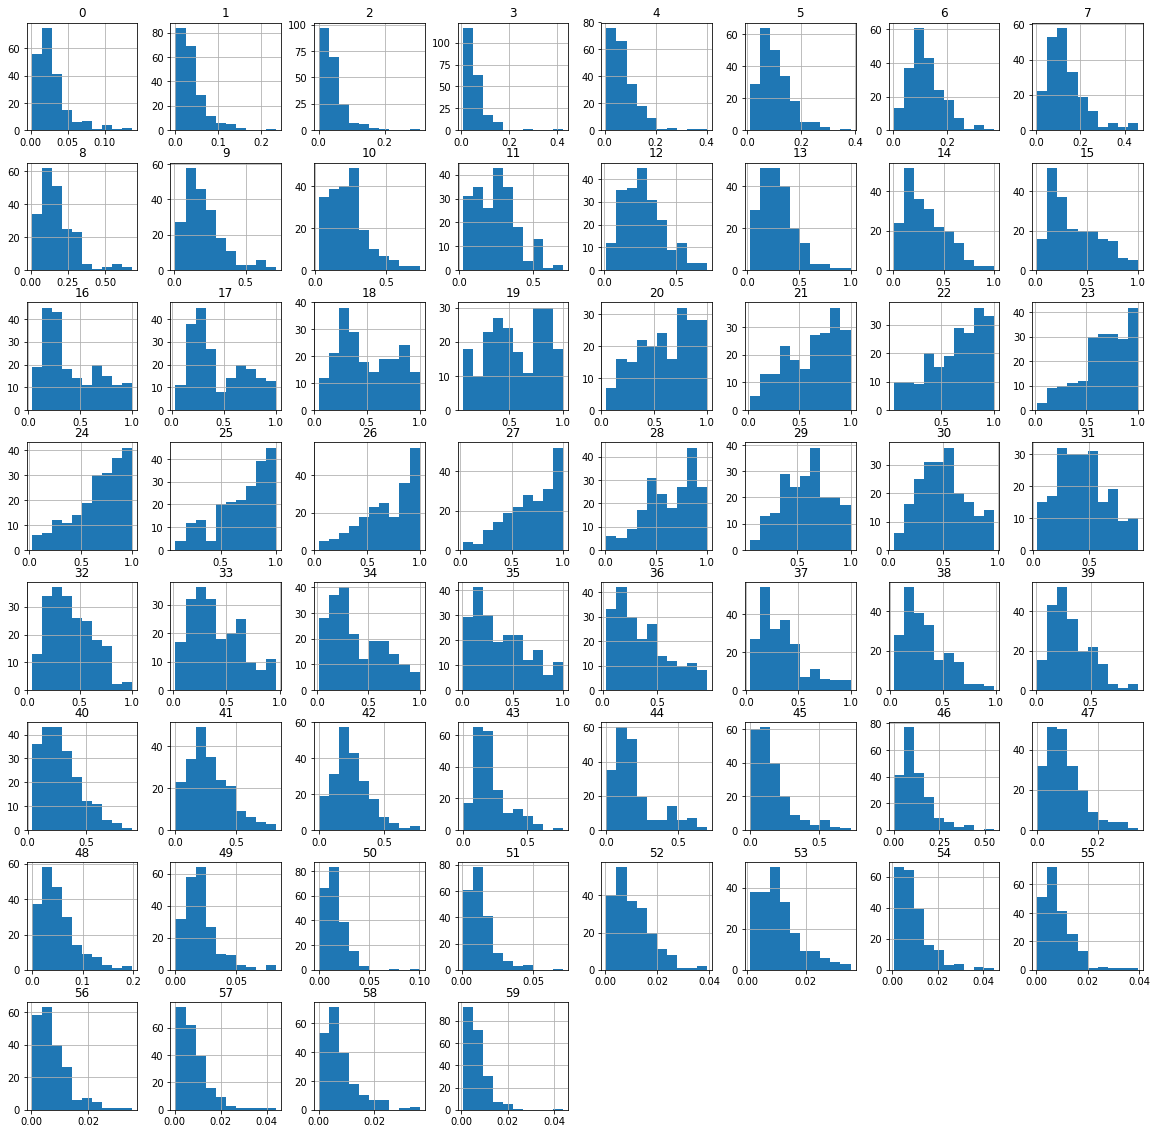

In [82]:
dt.hist(figsize=(20,20),grid=True,sharex=False,sharey=False)
py.show()


**Correaltion understanding**

1. To understand correlation of each feature with each , we can used pearson correlation and plot it using seaborn heatmap


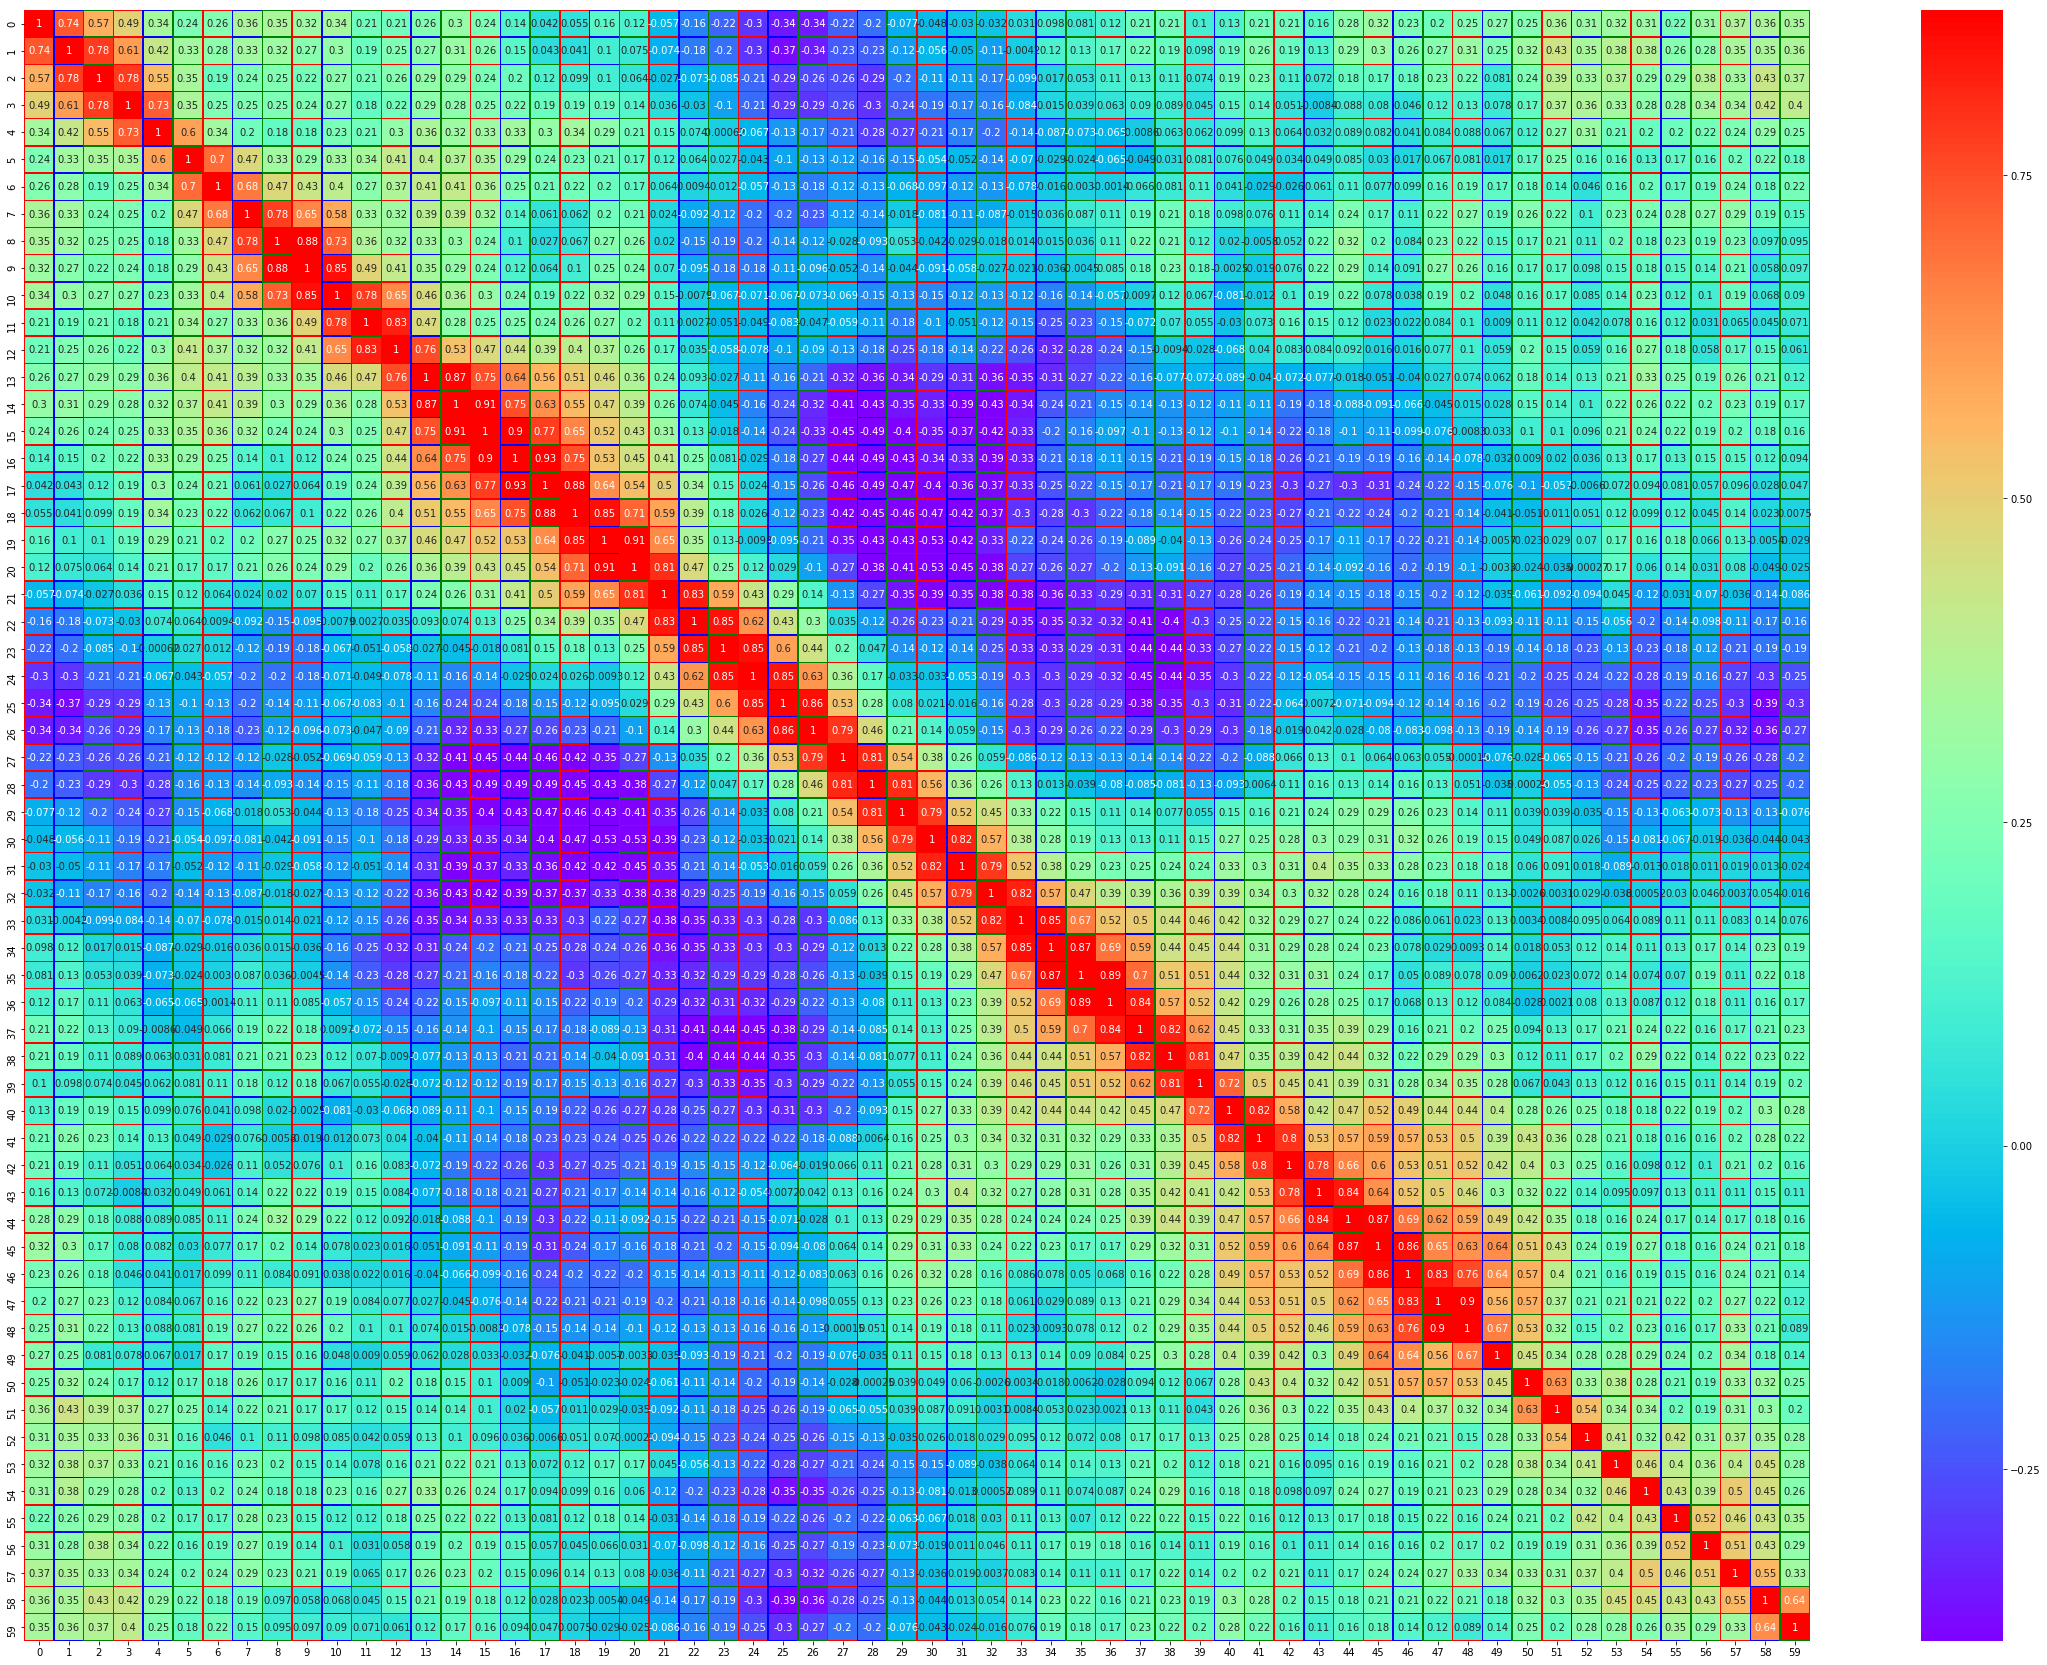

In [83]:
corrimp=dt.corr()
py.figure(figsize=(40,30))
sns.heatmap(corrimp,linewidth=0.5,cmap="rainbow",annot=True,robust=True,linecolor="rbg")
py.show()

**Skewness**

1. Most of the data available in dataset is in symmetrical distribution but still some of the dataset has higher skewness value
2. So we can convert higher skewness feature into logarithmic form
3. with criteria, if skewness id greater than 0.75 ,then we will convert it into logarithmic form

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
[ 2.11568909  2.14006691  2.63335062  3.37711666  2.00355736  1.23914646
  0.96380513  1.47040411  1.62206351  1.272       0.98067491  0.58442695
  0.73126171  1.01498149  0.75844388  0.68965109  0.6497507   0.52204534
  0.28113606 -0.08471478 -0.2509149  -0.38945472 -0.59005507 -0.6868616
 -0.78320802 -0.66672729 -0.62330611 -0.61099936 -0.438813   -0.13143314
  0.25791979  0.31115501  0.42080086  0.55922514  0.58737847  0.61538868
  0.67210208  1.02589936  0.90226787  0.85505605  0.8572862   0.85389462
  0.90274621  1.22616147  1.35696218  1.69434164  1.77721908  1.26848884
  1.26418317  1.74898334  2.69643327  2.0788446   1.05290855  1.08519127
  1.77701165  1.76793641  1.64114521  2.08316708  1.72495035  2.75569679]


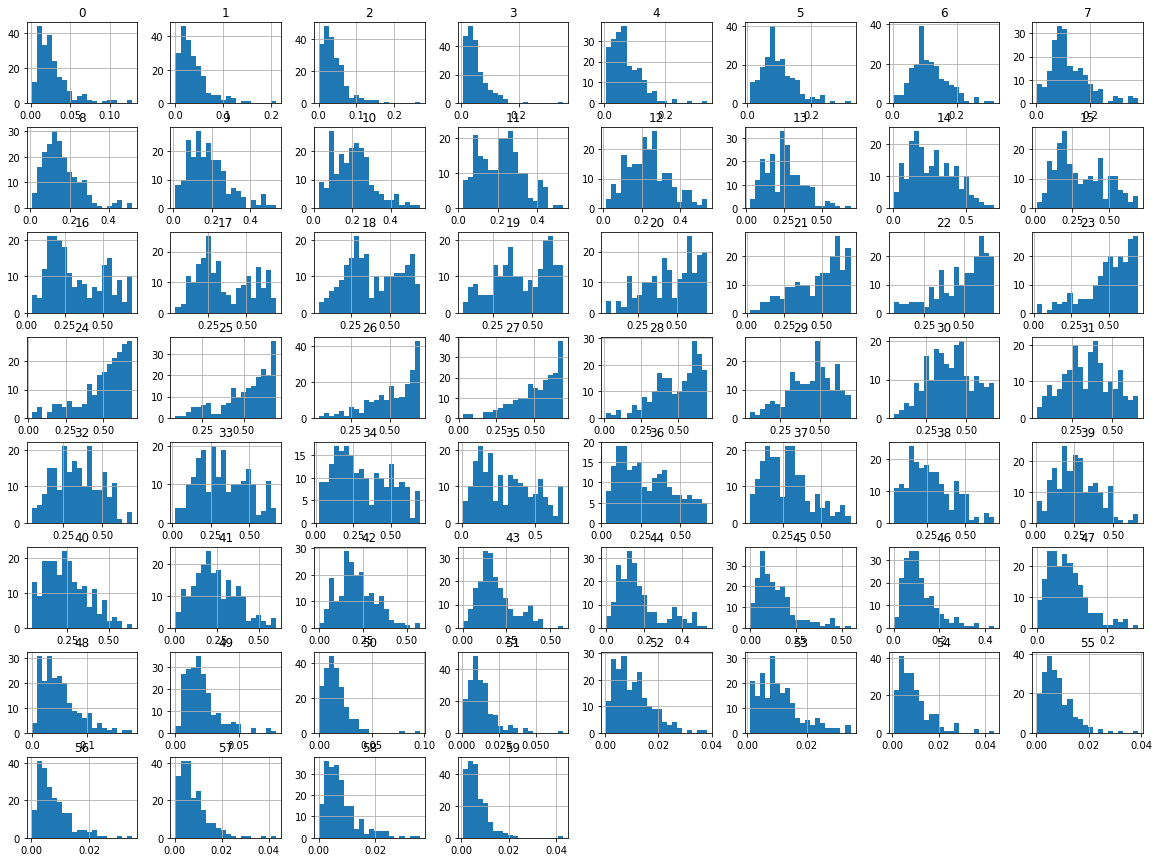

In [84]:
col_number = dt.select_dtypes(include=['number']).columns.tolist()
print(col_number)
for col_transform in col_number:
    skewness = sc.stats.skew(dt[col_number])
print(skewness)
if skewness.all() > 0.75:
    dt[col_number] = np.log1p(dt[col_number])
        
dt.hist(bins=20, figsize=(20, 15))
py.show()

**Dataset Splitting**

1. To start work on dataset we need to split dataset into X and Y
2. X contain all feature except Target
3. Y contain only Target variable
4. After using train_test_split , we need to split datset into X_train,X_test,Y_train,Y_test to train and make prediction

In [85]:
#split the dataset
array=dt.values
X=array[:,0:60].astype(float)
Y=array[:,60]

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=7,test_size=0.20)

**MOdel Selection**

1. currently we dont know , which algorithm is best suitable for this dataset.
2. without investingating further, let's apply bunch of Algorithm and check which is giving best result by default
3. for that we will create list of algorithm and pass that list to KFOLD to train and cross_val_score to give results

In [86]:
#Check Random algorithm
model=[]
model.append(('LogR',LogisticRegression()))
model.append(('SVC',SVC()))
model.append(('NB',GaussianNB()))
model.append(('DC',DecisionTreeClassifier()))
model.append(('KNN',KNeighborsClassifier()))

In [87]:
#check accuracy with default algo
names=[]
result=[]
for name , algo in model:
    kfold=KFold(n_splits=10, random_state=7)
    cv_result=cross_val_score(algo,X_train,Y_train,scoring='accuracy',cv=kfold,verbose=0)
    result.append(cv_result)
    names.append(name)
    msg=print(name,cv_result.mean()*100,cv_result.std())



LogR 77.02205882352942 0.08125332705458554
SVC 47.169117647058826 0.16948529411764704
NB 64.92647058823529 0.12194803618513815
DC 74.15441176470588 0.10867749044335602
KNN 82.53676470588236 0.06868705832228408


From the results its look like KNN algorithm gives us better results 

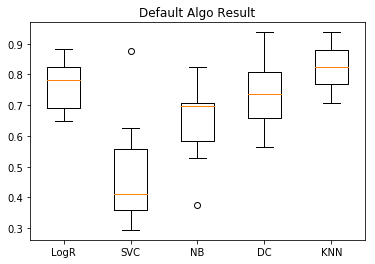

In [88]:
ax=py.subplot()
ax.set_title('Default Algo Result')
py.boxplot(result)
ax.set_xticklabels(names)
py.show()

Move to the next step,

now we will add data preprocessing using standard scaler in pipeline and try to re-evaluate Algo and check does it make any chnages in score

In [89]:
model2=[]
model2.append(('ScaleLogR',Pipeline([('Scaler',StandardScaler()),('LogR',LogisticRegression())])))
model2.append(('ScaleSVC',Pipeline([('Scaler',StandardScaler()),('SVC',SVC())])))
model2.append(('ScaleNB',Pipeline([('Scaler',StandardScaler()),('NB',GaussianNB())])))
model2.append(('ScaleDC',Pipeline([('Scaler',StandardScaler()),('DC',DecisionTreeClassifier())])))
model2.append(('ScaleKNN',Pipeline([('Scaler',StandardScaler()),('KNN',KNeighborsClassifier())])))
                                   

names=[]
result=[]
for name , algo in model2:
    kfold=KFold(n_splits=10, random_state=7)
    cv_result=cross_val_score(algo,X_train,Y_train,scoring='accuracy',cv=kfold,verbose=0)
    result.append(cv_result)
    names.append(name)
    msg=print(name,cv_result.mean()*100,cv_result.std())

ScaleLogR 75.84558823529413 0.09129276857136935
ScaleSVC 83.05147058823529 0.07337207431255666
ScaleNB 64.92647058823529 0.12194803618513815
ScaleDC 69.88970588235294 0.0643634404409671
ScaleKNN 83.16176470588236 0.05706943503509485


After applying Pipeline with Data preprocessing, we get slightly better result with SVC and KNN

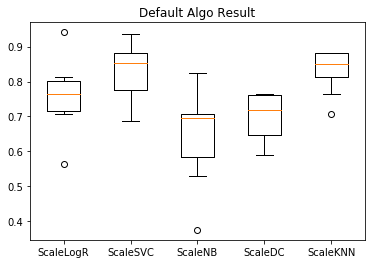

In [90]:
ax=py.subplot()
ax.set_title('Default Algo Result')
py.boxplot(result)
ax.set_xticklabels(names)
py.show()

**KNN Tuning**

Lets tune KNN algorithm and check if we change some parameter in it, does ot giving better score than earlier
1. For this we will use GridCVSearch 

In [91]:
#Tuning of KNN for better result

scaled=StandardScaler().fit(X_train)
trans=scaled.transform(X_train)
k_val=np.array([1,3,5,7,9,11,13,15,17,19,21,23,25])
par_grid=dict(n_neighbors=k_val)
#param=dict(n_neighbors=[3,5,10,15,20,25,30,35,40,45.50,60,70,80,90,100])
fitmodel=KNeighborsClassifier()
kfold=KFold(n_splits=10, random_state=7)
grid=GridSearchCV(estimator=fitmodel,param_grid=par_grid,scoring='accuracy',cv=kfold)
grid_result=grid.fit(trans,Y_train)
print("Best result for gridSearch",grid_result.best_score_,grid_result.best_params_)

name=grid_result.cv_results_['mean_test_score']
std=grid_result.cv_results_['std_test_score']
param=grid_result.cv_results_['params']

for name,std,param in zip(name,std,param):
    print(name,std,param)



Best result for gridSearch 0.8433734939759037 {'n_neighbors': 1}
0.8433734939759037 0.06492672732474543 {'n_neighbors': 1}
0.8192771084337349 0.07607329195008986 {'n_neighbors': 3}
0.8253012048192772 0.06770510214227764 {'n_neighbors': 5}
0.7771084337349398 0.0930356706304946 {'n_neighbors': 7}
0.7530120481927711 0.08347072970843505 {'n_neighbors': 9}
0.7349397590361446 0.08763455738539852 {'n_neighbors': 11}
0.7289156626506024 0.07042314630133359 {'n_neighbors': 13}
0.7349397590361446 0.07772327240059004 {'n_neighbors': 15}
0.7228915662650602 0.09492099146437588 {'n_neighbors': 17}
0.7349397590361446 0.07102304893103369 {'n_neighbors': 19}
0.7168674698795181 0.07357699996170414 {'n_neighbors': 21}
0.7228915662650602 0.05682886396930257 {'n_neighbors': 23}
0.6867469879518072 0.08330593363505687 {'n_neighbors': 25}


With All combination we get best combination of Best result for gridSearch 0.8433734939759037 {'n_neighbors': 1}

Again lets tune another Algo SVC:
Best result for gridSearch 0.8614457831325302 {'C': 1.5, 'kernel': 'rbf'}

So from above results we can coclude that SVC algo gives better results than KNN

Now Lets evaluate our dataset on Ensembles

In [92]:
# Tune with SVM

scaled=StandardScaler().fit(X_train)
trans=scaled.transform(X_train)

C_val=np.array([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.2,1.5,1.8,2.0])
kernal=['linear', 'poly', 'rbf', 'sigmoid']
par_grid=dict(C=C_val,kernel=kernal)
fitmodel=SVC()
kfold=KFold(n_splits=10, random_state=7)
grid=GridSearchCV(estimator=fitmodel,param_grid=par_grid,scoring='accuracy',cv=kfold)
grid_result=grid.fit(trans,Y_train)
print("Best result for gridSearch",grid_result.best_score_,grid_result.best_params_)

name=grid_result.cv_results_['mean_test_score']
std=grid_result.cv_results_['std_test_score']
param=grid_result.cv_results_['params']

for name,std,param in zip(name,std,param):
    print(name,std,param)

Best result for gridSearch 0.8614457831325302 {'C': 1.5, 'kernel': 'rbf'}
0.7710843373493976 0.09493364075663965 {'C': 0.1, 'kernel': 'linear'}
0.5481927710843374 0.11374104139538789 {'C': 0.1, 'kernel': 'poly'}
0.5662650602409639 0.12808342113361587 {'C': 0.1, 'kernel': 'rbf'}
0.7108433734939759 0.06309884692306722 {'C': 0.1, 'kernel': 'sigmoid'}
0.7650602409638554 0.07540920674388557 {'C': 0.2, 'kernel': 'linear'}
0.6204819277108434 0.1375743399043259 {'C': 0.2, 'kernel': 'poly'}
0.7289156626506024 0.08573995660513359 {'C': 0.2, 'kernel': 'rbf'}
0.7530120481927711 0.06393902567587641 {'C': 0.2, 'kernel': 'sigmoid'}
0.7530120481927711 0.08347072970843508 {'C': 0.3, 'kernel': 'linear'}
0.6445783132530121 0.13229030877107076 {'C': 0.3, 'kernel': 'poly'}
0.7831325301204819 0.0834499481492615 {'C': 0.3, 'kernel': 'rbf'}
0.7409638554216867 0.0524711061296956 {'C': 0.3, 'kernel': 'sigmoid'}
0.7469879518072289 0.08569637531514977 {'C': 0.4, 'kernel': 'linear'}
0.6445783132530121 0.0839472856

In [93]:
#Evaluate Ensembles

pipeEse=[]
pipeEse.append(('ScaledAdaB',Pipeline([('Scaler',StandardScaler()),('AdaB',AdaBoostClassifier())])))
pipeEse.append(('ScaledGB',Pipeline([('Scaler',StandardScaler()),('GB',GradientBoostingClassifier())])))
pipeEse.append(('ScaledRFR',Pipeline([('Scaler',StandardScaler()),('RFR',RandomForestClassifier())])))
pipeEse.append(('ScaledETR',Pipeline([('Scaler',StandardScaler()),('ETR',ExtraTreesClassifier())])))

names=[]
result=[]
for name,model in pipeEse:
    kfolds=KFold(n_splits=10,random_state=7,)
    cv_results=cross_val_score(model,X_train,Y_train,cv=kfolds,scoring='accuracy')
    result.append(cv_results)
    names.append(name)
    print(name, cv_results.mean() ,cv_results.std())

ScaledAdaB 0.8139705882352942 0.06601696463316956
ScaledGB 0.8422794117647058 0.1026051500913064
ScaledRFR 0.7716911764705883 0.10426473180950477
ScaledETR 0.7757352941176471 0.08417431760308268


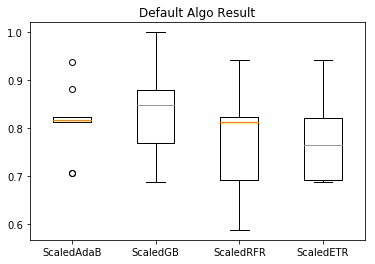

In [94]:
ax=py.subplot()
ax.set_title('Default Algo Result')
py.boxplot(result)
ax.set_xticklabels(names)
py.show()

After training dataset on Esembles, out of All, GradientBoosting & Extraa Tree Classifier gives better results 
Now lets tune the Gradient boosting to evaluate more

With Gradient boosting tuning we get best results:
0.8614457831325302 {'n_estimators': 350}

with ExtraaTreeClassifier tuning we get best results:
Best result for gridSearch 0.8855421686746988 {'criterion': 'entropy', 'max_depth': 8, 'n_estimators': 60}

So, we can finalize our model with ExtraaTreeClassifier

In [95]:
#Tune ExtraTreesClassifier

scaled=StandardScaler().fit(X_train)
trans=scaled.transform(X_train)
k_val=[5,10,15,20,25,30,35,40,45,50,60,70,80,90,100]
index=['gini','entropy']
max_depth=[2, 3, 4, 5, 6, 7, 8] 
par_grid=dict(n_estimators=k_val,criterion=index,max_depth=max_depth)

#param=dict(n_neighbors=[3,5,10,15,20,25,30,35,40,45.50,60,70,80,90,100])

fitmodel=ExtraTreesClassifier()


kfold=KFold(n_splits=10, random_state=7)
grid=GridSearchCV(estimator=fitmodel,param_grid=par_grid,scoring='accuracy',cv=kfold)
grid_result=grid.fit(trans,Y_train)
print("Best result for gridSearch",grid_result.best_score_,grid_result.best_params_)

name=grid_result.cv_results_['mean_test_score']
std=grid_result.cv_results_['std_test_score']
param=grid_result.cv_results_['params']

for name,std,param in zip(name,std,param):
    print(name,std,param)

Best result for gridSearch 0.8795180722891566 {'criterion': 'gini', 'max_depth': 6, 'n_estimators': 80}
0.7108433734939759 0.10112880400946231 {'criterion': 'gini', 'max_depth': 2, 'n_estimators': 5}
0.7289156626506024 0.08573995660513359 {'criterion': 'gini', 'max_depth': 2, 'n_estimators': 10}
0.7409638554216867 0.08808253151242586 {'criterion': 'gini', 'max_depth': 2, 'n_estimators': 15}
0.7409638554216867 0.08783073227107477 {'criterion': 'gini', 'max_depth': 2, 'n_estimators': 20}
0.7349397590361446 0.08901369104322239 {'criterion': 'gini', 'max_depth': 2, 'n_estimators': 25}
0.7228915662650602 0.08066806636456748 {'criterion': 'gini', 'max_depth': 2, 'n_estimators': 30}
0.7590361445783133 0.06969376751745532 {'criterion': 'gini', 'max_depth': 2, 'n_estimators': 35}
0.7831325301204819 0.06143831335482956 {'criterion': 'gini', 'max_depth': 2, 'n_estimators': 40}
0.7409638554216867 0.07295421103405927 {'criterion': 'gini', 'max_depth': 2, 'n_estimators': 45}
0.7590361445783133 0.071

In [96]:
#check with GB Tuning
scaler=StandardScaler().fit(X_train)
trans=scaler.transform(X_train)
param_grid=dict(n_estimators=np.array([10,20,50,10,150,200,250,300,350,400,450,500]))
model=GradientBoostingClassifier()
kfolds=KFold(n_splits=10,random_state=7,)
grid=GridSearchCV(estimator=model,param_grid=param_grid,scoring='accuracy',cv=kfold)
grid_result=grid.fit(trans,Y_train)
print(grid_result.best_score_,grid_result.best_params_)

0.8614457831325302 {'n_estimators': 200}


In [100]:
#Final model Initialization
scaleF=StandardScaler().fit(X_train)
trnsF=scaleF.transform(X_train)
modelB=ExtraTreesClassifier(n_estimators=60,criterion='entropy',random_state=7,max_depth=8)
modelB.fit(trnsF,Y_train)
trnsF2=scaleF.transform(X_test)
decision=modelB.predict(trnsF2)
finalScore=accuracy_score(decision,Y_test)
finalScore1=confusion_matrix(decision,Y_test)
finalScore2=classification_report(decision,Y_test)

print(finalScore)
print(finalScore1)
print(finalScore2)



0.8809523809523809
[[24  2]
 [ 3 13]]
              precision    recall  f1-score   support

           M       0.89      0.92      0.91        26
           R       0.87      0.81      0.84        16

   micro avg       0.88      0.88      0.88        42
   macro avg       0.88      0.87      0.87        42
weighted avg       0.88      0.88      0.88        42



This is our final result and resuts look good